<a href="https://colab.research.google.com/github/nowshine-sharmili-piuli/Artificial-Intelligence-Machine-Learning-Gen-AI-Concept-and-Applications/blob/main/C223285_Kmeans_Assignments_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**K-Means Clustering**

Step-1: Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Step-2: Load the dataset

In [ ]:
#Load the data
df=pd.read_csv('/content/sample_data/Mall_Customers.csv')
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

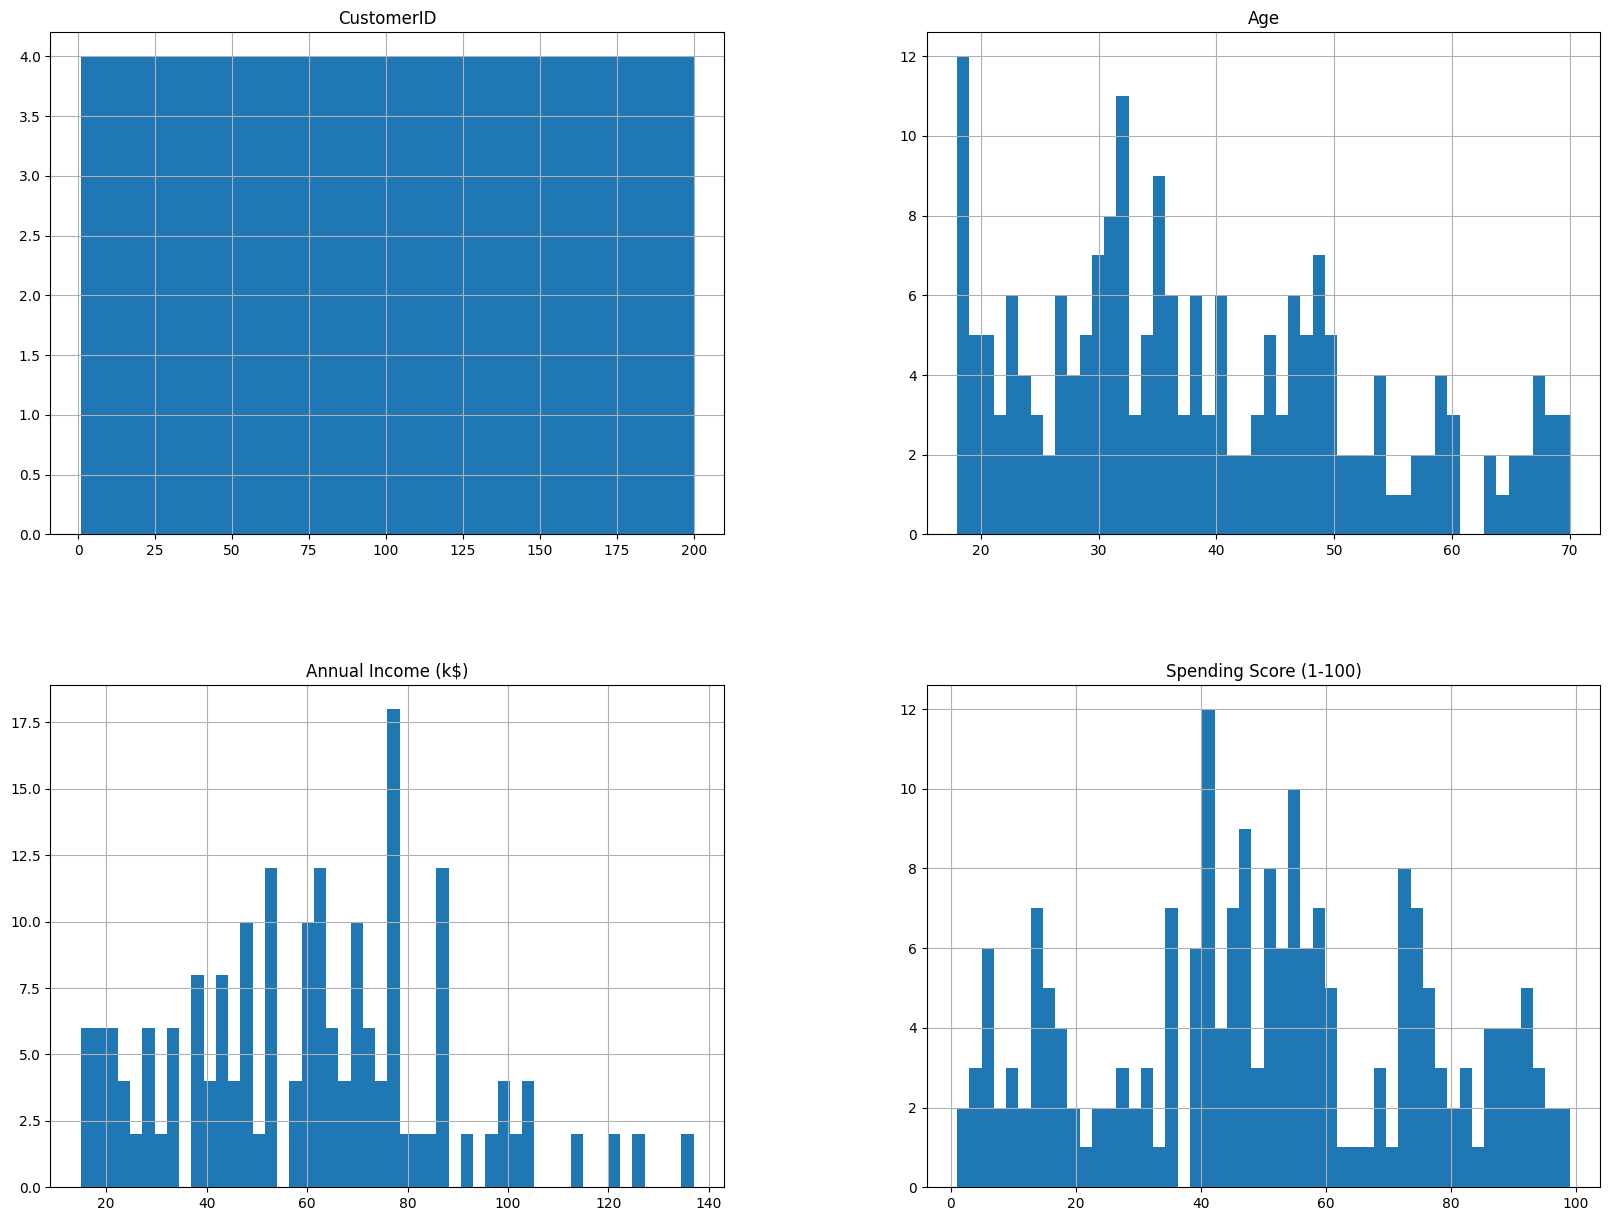

In [ ]:
df.hist(bins=50, figsize=(20,15))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(f"Total Customers: {len(df)}")

Total Customers: 200


Step-3: Prepare Data for Clustering

In [ ]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
print("Data ready for Clustering")
X.head()
# print(X)

Data ready for Clustering


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Step-4: Visualize data before clustering

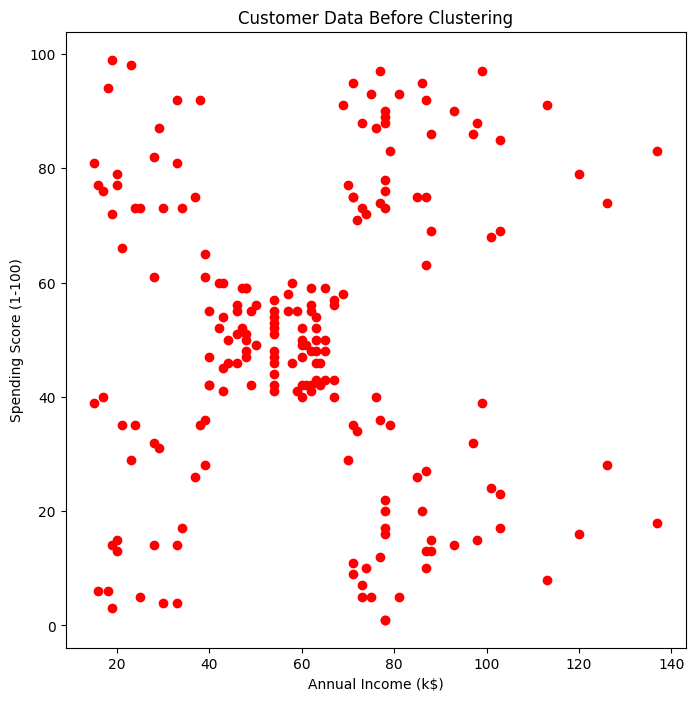

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Data Before Clustering')
plt.show()

Step-5:Find the best K <b>(Elbow method)</b>

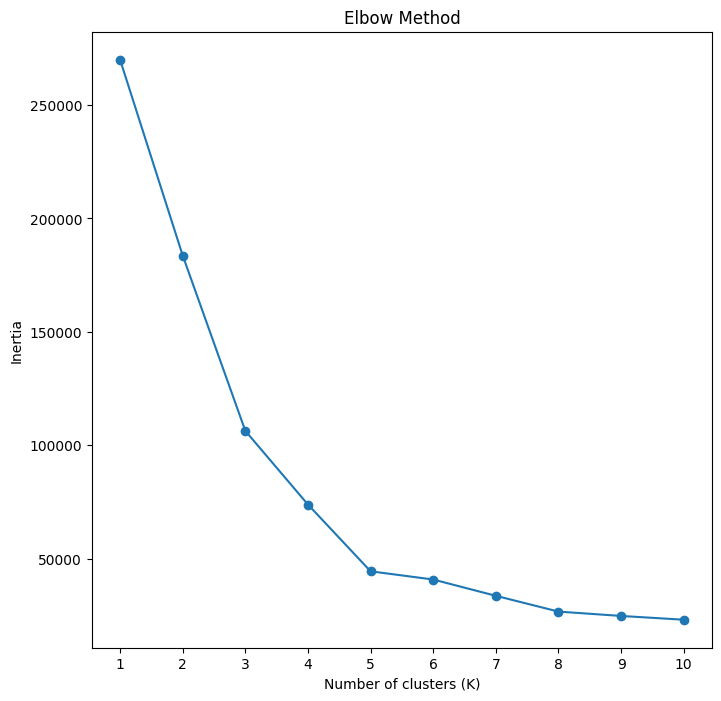

In [ ]:
#Try K 1-10
inertia_list=[]
for k in range(1,11):
  kmean=KMeans(n_clusters=k,random_state=42)
  kmean.fit(X)
  inertia_list.append(kmean.inertia_)

#plot Elbow
plt.figure(figsize=(8,8))
plt.plot(range(1,11),inertia_list,marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(range(1,11))
plt.show()

Step-6: Apply K-Means Clustering
<br>Cluster on K=5

In [ ]:
kmeans_1=KMeans(n_clusters=5,random_state=42)

#Fit the model and get cluster labels
df['Cluster_K5']=kmeans_1.fit_predict(X)

#Get the cluster centers
centers_1=kmeans_1.cluster_centers_


#Print the cluster centers
print(f"Cluster Centers\n:{centers_1}")

print("\nFirst 10 customers with their clusters:")
df.head(10)

Cluster Centers
:[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

First 10 customers with their clusters:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_K5
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


Cluster on K=4

In [ ]:
kmeans_2=KMeans(n_clusters=4,random_state=42)

#Fit the model and get cluster labels
df['Cluster_K4']=kmeans_2.fit_predict(X)

#Get the cluster centers
centers_2=kmeans_2.cluster_centers_


#Print the cluster centers
print(f"Cluster Centers\n:{centers_2}")

print("\nFirst 10 customers with their clusters:")
df.head(10)

Cluster Centers
:[[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]

First 10 customers with their clusters:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_K5,Cluster_K4
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,0
5,6,Female,22,17,76,2,2
6,7,Female,35,18,6,4,0
7,8,Female,23,18,94,2,2
8,9,Male,64,19,3,4,0
9,10,Female,30,19,72,2,2


Step-7: Visualize the cluster

For K=5

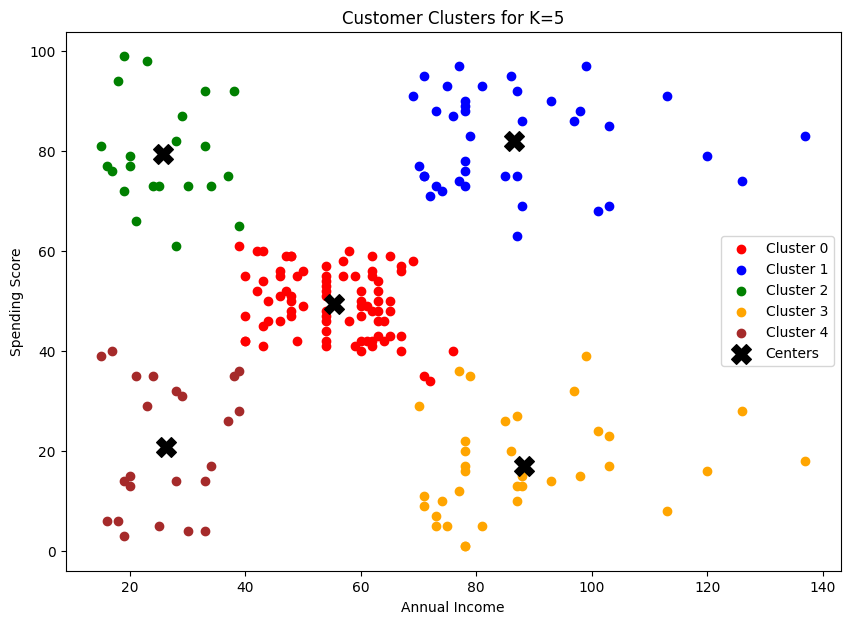

In [ ]:
# Plot with colors for each cluster
plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green', 'orange','brown']

for i in range(5):
    cluster_data_1 = df[df['Cluster_K5'] == i]
    plt.scatter(cluster_data_1['Annual Income (k$)'],
                cluster_data_1['Spending Score (1-100)'],
                c=colors[i],
                label=f'Cluster {i}')

# Plot cluster centers
centers_1= kmeans_1.cluster_centers_
plt.scatter(centers_1[:, 0], centers_1[:, 1],
            c='black', marker='X', s=200, label='Centers')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters for K=5')
plt.legend()
plt.show()

For K=4

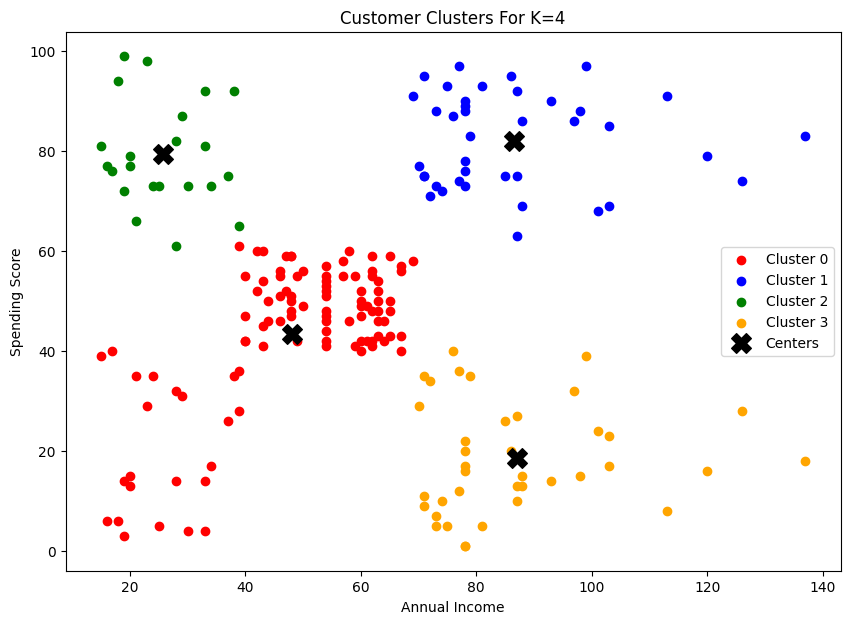

In [ ]:
# Plot with colors for each cluster
plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green', 'orange']

for i in range(4):
    cluster_data_2= df[df['Cluster_K4'] == i]
    plt.scatter(cluster_data_2['Annual Income (k$)'],
                cluster_data_2['Spending Score (1-100)'],
                c=colors[i],
                label=f'Cluster {i}')

# Plot cluster centers
centers_2= kmeans_2.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1],
            c='black', marker='X', s=200, label='Centers')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters For K=4')
plt.legend()
plt.show()

Step-8: Understand the Cluster

K=4 Clustering and Showing Summary

In [ ]:
# fit the K=4 model and get cluster labels for K=4
# df['Cluster_K4'] = kmeans_2.fit_predict(X)

#See Average value of Each cluster
cluster_summary=df.groupby('Cluster_K4')[['Annual Income (k$)','Spending Score (1-100)']].mean().round(3)
cluster_summary = cluster_summary.round(3)

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
            Annual Income (k$)  Spending Score (1-100)
Cluster_K4                                            
0                       48.168                  43.396
1                       86.538                  82.128
2                       25.727                  79.364
3                       87.000                  18.632


K=5 Clustering and Showing Summary

In [ ]:
# fit the K=5 model and get cluster labels for K=5
df['Cluster_K5'] = kmeans_1.fit_predict(X)

# See Average value of Each cluster for K=5
cluster_summary_k5 = df.groupby('Cluster_K5')[['Annual Income (k$)','Spending Score (1-100)']].mean().round(3)

print("Cluster Summary for K=5:")
print(cluster_summary_k5)

Cluster Summary for K=5:
            Annual Income (k$)  Spending Score (1-100)
Cluster_K5                                            
0                       55.296                  49.519
1                       86.538                  82.128
2                       25.727                  79.364
3                       88.200                  17.114
4                       26.304                  20.913


In [ ]:
# Count customers in each cluster k=4
print("Customers per cluster:\n")
print(df['Cluster_K4'].value_counts().sort_index())

Customers per cluster:

Cluster_K4
0    101
1     39
2     22
3     38
Name: count, dtype: int64


In [ ]:
# Re-fit the K=5 model and get cluster labels for K=5
# df['Cluster_K5'] = kmeans_1.fit_predict(X)

# Count customers in each cluster k=5
print("Customers per cluster:\n")
print(df['Cluster_K5'].value_counts().sort_index())

Customers per cluster:

Cluster_K5
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
